In [4]:

import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
# Note - you will need version 0.24.1 of scikit-learn to load this library (SequentialFeatureSelector)
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np

# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 20})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

from clean_split_data import clean_data
from clean_split_data import split_data
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
data = pd.read_csv('data.csv')
data.pop('Unnamed: 32')

data = clean_data(data)
X_train, X_test, y_train, y_test = split_data(data)


     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
68         9.029         17.33           58.79      250.5          0.10660   
181       21.090         26.57          142.70     1311.0          0.11410   
63         9.173         13.86           59.20      260.9          0.07721   
248       10.650         25.22           68.01      347.0          0.09657   
60        10.170         14.88           64.55      311.9          0.11340   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
106       11.640         18.33           75.17      412.5          0.11420   
270       14.290         16.82           90.30      632.6          0.06429   
435       13.980         19.62           91.12      599.5          0.10600   
102       12.180         20.52           77.22      458.7          0.08013   

     compactness_mean  concavity_mean  concave points_mean  sym

In [52]:
tree_count = 1000
gradient_model = GradientBoostingRegressor(n_estimators=tree_count, learning_rate=0.1,max_depth=1)
gradient_model.fit(X_train,(y_train))
y_predict = np.round(gradient_model.predict(X_test))
MSE_value = mean_squared_error(y_test, y_predict)
accuracy = np.round(accuracy_score(y_test,y_predict)*100)

print(accuracy)
print(MSE_value)

91.0
0.08771929824561403


In [36]:
MSE_Value_2 = []
Acc_value_2 = []
MSE_Value_1 = []
Acc_value_1 = []
for K in range(9):
    K=K+1
    sfs_forward = SequentialFeatureSelector(GradientBoostingRegressor(), 
                                            n_features_to_select=K,
                                            direction='forward').fit(X_train, y_train)

    f_names = np.array(data.columns)
    selected = sfs_forward.get_support(indices=True)
    print("Selected input features using Forward Stepwise Selection:\n", f_names[selected])
    columns_names = list(f_names[selected])
    
    if 'diagnosis' in columns_names:
        columns_names.remove('diagnosis')
    if 'id' in columns_names:
        columns_names.remove('id')
    
    x_manip = data[columns_names]
    print(len(x_manip))

    y = data.diagnosis
    
    print(len(y))

    X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip, y, test_size=0.2, random_state=42)
    

    model_2  = gradient_model.fit(X_train_manip,(y_train_2))
    y_predict_2 = model_2.predict(X_test_manip)
    y_predict_1 = model_2.predict(X_train_manip)
    
    y_predict_2 = np.round(y_predict_2)
    y_predict_1 = np.round(y_predict_1)

    accuracy_2 = accuracy_score(y_test_2,y_predict_2)
    accuracy_1 = accuracy_score(y_train_2,y_predict_1)
    MSE_value_2 = mean_squared_error(y_test_2, y_predict_2)
    MSE_value_1 = mean_squared_error(y_train_2, y_predict_1)
    
    Acc_value_2.append(accuracy_2)
    MSE_Value_2.append(MSE_value_2)
    Acc_value_1.append(accuracy_1)
    MSE_Value_1.append(MSE_value_1)
    
    
    

Selected input features using Forward Stepwise Selection:
 ['concavity_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'concavity_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'radius_mean' 'concavity_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'radius_mean' 'perimeter_mean' 'concavity_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'radius_mean' 'perimeter_mean' 'area_mean' 'concavity_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'radius_mean' 'perimeter_mean' 'area_mean' 'compactness_mean'
 'concavity_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'radius_mean' 'perimeter_mean' 'area_mean' 'compactness_mean'
 'concavity_mean' 'concave points_mean']
569
569
Selected input features using Forward Stepwise Selection:
 ['diagnosis' 'radius_mean' 'per

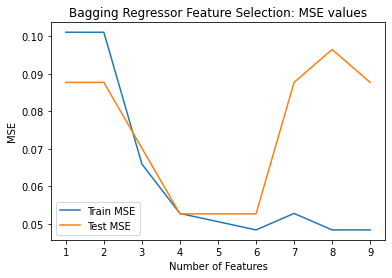

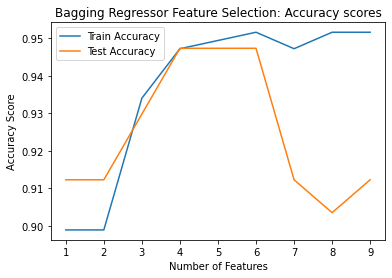

In [38]:
ks= [1,2,3,4,5,6,7,8,9]

plt.plot(ks, MSE_Value_1, label = 'Train MSE')
plt.plot(ks, MSE_Value_2, label = "Test MSE")
plt.xlabel("Number of Features")
plt.ylabel("MSE")
plt.title("Bagging Regressor Feature Selection: MSE values")
plt.legend()
plt.show()

#plotting overall r performacnce based on k
plt.plot(ks, Acc_value_1, label = 'Train Accuracy')
plt.plot(ks, Acc_value_2, label = "Test Accuracy")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy Score")
plt.title("Bagging Regressor Feature Selection: Accuracy scores")
plt.legend()
plt.show()

In [43]:
columns_names = list(('radius_mean', 'perimeter_mean', 'concavity_mean'))

x_manip_GB = data[columns_names]

y = data.diagnosis

X_train_manip, X_test_manip, y_train_2, y_test_2 = train_test_split(x_manip_GB, y, test_size=0.2, random_state=42)

In [51]:
model_2  = gradient_model.fit(X_train_manip,(y_train_2))
y_predict_2 = np.round(model_2.predict(X_test_manip))

accuracy_2 = np.round(accuracy_score(y_test_2,y_predict_2)*100)
MSE_value_2 = mean_squared_error(y_test_2, y_predict_2)

print(accuracy_2)
print(MSE_value_2)



95.0
0.05263157894736842


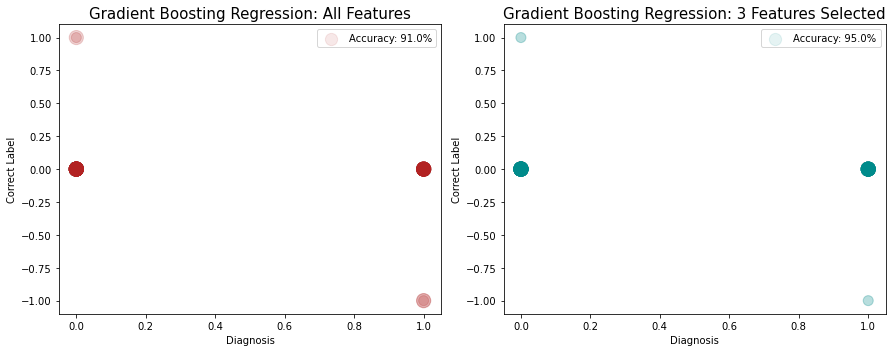

In [55]:
fig,ax = plt.subplots(1,2,figsize=(12.5,5))
ax[0].scatter(y_test, y_predict - y_test, marker='o',s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'FireBrick',label = "Accuracy: "+str(accuracy)+"%")
ax[0].set_title('Gradient Boosting Regression: All Features', fontsize=15)
ax[0].set_xlabel('Diagnosis')
ax[0].set_ylabel('Correct Label')
ax[0].legend()

ax[1].scatter(y_test_2, y_predict_2 - y_test_2,s=(200-(100*abs(y_predict_2-y_test_2))),alpha=0.1,c= 'DarkCyan',label = "Accuracy: "+str(accuracy_2)+"%")
ax[1].set_title('Gradient Boosting Regression: 3 Features Selected', fontsize=15)
ax[1].set_xlabel('Diagnosis')
ax[1].set_ylabel('Correct Label')
ax[1].legend()

plt.tight_layout()